In [2]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgba
import networkx as nx
from typing import *
from torch import nn

from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 100)


sys.path.append('/mnt/home/ricardo.moreira/zaitorch/src')
sys.path.append('/mnt/home/ricardo.moreira/envs/zaitorch-env/lib/python3.7/site-packages')

In [4]:
SAVE_BASE_PATH = "causal_diconstruct_experiments"
ABS_SAVE_BASE_PATH = os.path.abspath(SAVE_BASE_PATH)
MODEL_RESULTS_PATH = os.path.join(SAVE_BASE_PATH, "all_results.csv")
EXCLUDE_KEYS = ["optimizer"]

In [8]:
def correct_diversity(df_results):
    df_results = df_results.copy(deep=True)
    df_results["graph_type"] = df_results["model_category"].apply(
        lambda x: x.split("_")[2]
    )
    df_results["black_box"] = df_results["model_category"].apply(
        lambda x: "_".join(x.split("_")[3:])
    )
    correction_factor = {
        ("cub_nn", "notears"): 7 / 3,
        ("cub_nn", "pc"): 7 / 4,
        ("cub_nn", "ges"): 7 / 5,
        ("cub_nn", "grasp"): 7 / 5,
        ("cub_nn", "icalingam"): 7 / 4,
        ("cub_nn", "trivial"): 1,
        ("fraud_nn", "notears"): 6 / 4,
        ("fraud_nn", "pc"): 6 / 6,
        ("fraud_nn", "ges"): 6 / 5,
        ("fraud_nn", "grasp"): 6 / 3,
        ("fraud_nn", "icalingam"): 6 / 5,
        ("fraud_nn", "trivial"): 1,
        ("fraud_lgbm", "notears"): 6 / 5,
        ("fraud_lgbm", "pc"): 6 / 6,
        ("fraud_lgbm", "ges"): 6 / 5,
        ("fraud_lgbm", "grasp"): 6 / 5,
        ("fraud_lgbm", "icalingam"): 6 / 5,
        ("fraud_lgbm", "trivial"): 1,
    }
    for div_c in [
        "validation_diversity_dataset_0",
        "validation_diversity_dataset_1",
        "test_diversity_dataset_0",
        "test_diversity_dataset_1",
    ]:
        df_results[div_c] = df_results.apply(
            lambda x: x[div_c] * correction_factor[(x["black_box"], x["graph_type"])],
            axis=1,
        )
        
    return df_results

In [9]:
model_results_df = pd.read_csv(MODEL_RESULTS_PATH)

Loading Category: trainable_global_notears_fraud_lgbm. 	50 Models.
Skipping model 8dfe4641fc9923bfac767162b25961e5. Already collected.
Skipping model 065a36275ebda3cfb64de41ac9820053. Already collected.
Skipping model dbfc07e669608eda0a87a47c85a1f9e3. Already collected.
Skipping model 5cd542223497b46ea56d50138fccc0d0. Already collected.
Skipping model 3959b3a010527192af4f13865d210e16. Already collected.
Skipping model 986abcb75636e28945abdb868a006cb5. Already collected.
Skipping model 59c1fce3052fdaaebd119ab63c00bce3. Already collected.
Skipping model ca5302d31e50f23baa1f4390d91f64f3. Already collected.
Skipping model 6f2fa57632da9b439e8642002df9fe4a. Already collected.
Skipping model d0a85564153d37dc05d9bbcb33a262d0. Already collected.
Skipping model ebe55ea6bf273b9ae70a71fa51adbdc8. Already collected.
Skipping model 0ae90b4bd25256823c22f21f5f4e3321. Already collected.
Skipping model e37376a729e8727961505ad4e6b74f38. Already collected.
Skipping model 0622948b2305ab44b8a63f658d1a1c90. 

Skipping model c55b2534f39cc7d633a692dffedb8989. Already collected.
Skipping model cb409c8a3e0956c6e8432a85e7827c68. Already collected.
Skipping model 1f1fce199a384a32e2bf44a19150a059. Already collected.
Skipping model 59701b997653c38e03c705d7f14650eb. Already collected.
Skipping model 37a229c4e76d84a1a43b9fe706ecf64c. Already collected.
Skipping model 0ba0c3e030307b7687ae29a409ce1ee0. Already collected.
Skipping model 2a4971ad0682681800527d9371caf191. Already collected.
Skipping model 08be568ab5e1f1d4139a3b35c5c777a7. Already collected.
Skipping model 0f598ab0a32db7352b1d2e21dc1685f8. Already collected.
Skipping model f4c59395c70ace7d2949d18fc15633cf. Already collected.
Skipping model 632176b57f0d8ea6438b75b1add23d38. Already collected.
Skipping model 84c6efbebbd98de747e9d5820843d06f. Already collected.
Skipping model 2b64b5abd5876e750c02dcf25e7d4395. Already collected.
Skipping model cb0049aec2f878901e1ac741644f6a26. Already collected.
Skipping model 66c52d672c5637d14fea482655e39344.

Skipping model df5844289768aff37b5deca63ec5c504. Already collected.
Skipping model 10b5a0909a42c7c99144a9e25ae8591e. Already collected.
Skipping model 3b3976054db6149c953b3f09ef2c3708. Already collected.
Skipping model 3fcef7e4ffa17d35ec0334deaff33213. Already collected.
Skipping model 31df5de136da4aa2baf1a6abffbaa3e1. Already collected.
Skipping model 434fdf55c5f52c36bd47d4a8828ce875. Already collected.
Skipping model aa96b4f9b14d30562b5f00de54069d30. Already collected.
Skipping model cc048bc4e9225d011c7435b5cf53181c. Already collected.
Skipping model b0c1a34936f0711f00c0a8bce929b5f9. Already collected.
Skipping model 091291d1475e053638c2b024a076fde6. Already collected.
Skipping model b52b5f4489422ca811b3a4d69c1e9c2d. Already collected.
Skipping model 0276ed6787cb2ec212bf0996d30a8b02. Already collected.


Loading Category: exogenous_local_notears_fraud_nn. 	50 Models.
Skipping model eba037723fd0e60bf1515bb3834b315a. Already collected.
Skipping model 19af601345355a05e02de73d36643a87. A

Skipping model 7949789b3b8ac5f704304a969602be58. Already collected.
Skipping model b6eca2d068d19442b501154e20b03052. Already collected.
Skipping model cb55ecf117c1abddf0b762254ed33769. Already collected.
Skipping model ef9d4f32fff63332427aabe3eead067f. Already collected.
Skipping model e1651a660022cc643cb8486319132ba2. Already collected.
Skipping model c8db9251f49257b31d0b035f05c229c5. Already collected.
Skipping model f88cf1cd73ff7c41f5d15f30836b528a. Already collected.
Skipping model d58d8e50496a0e9a17f36ff55914fd0e. Already collected.
Skipping model 00f34692215299b5ecbb60f0963384b3. Already collected.
Skipping model c963ea5a750a8aaa086cb02fa43669e3. Already collected.
Skipping model 8fa19745344390a5e8db0422e5e9bd86. Already collected.
Skipping model 0cc4e5ddecc8b8a39d1ba1911084c733. Already collected.
Skipping model b09de39d9c2f64eabb4569a40411cbbc. Already collected.
Skipping model 62a5280a686ef9a7e5c7104a99c023b4. Already collected.
Skipping model 0f4ac44c729836ea295348bcf65596ef.

Skipping model 7daaa295d5878761723d88f7568e9e44. Already collected.
Skipping model 3d34bf62303bc84ebdd20b68b83e85f3. Already collected.
Skipping model d0f501aa8fc064eb6ff70458f0c73dec. Already collected.
Skipping model 4ee4856df28b16e194b26f8b07e8dad6. Already collected.
Skipping model feba9e866af2514dbe968ec8c127d85a. Already collected.
Skipping model 0f6e07c129798aa7c0cb949395653f20. Already collected.
Skipping model 38c1ef58fe5192e375359a67d0015f3b. Already collected.
Skipping model 1e3e732392dd93c274566685c85b042a. Already collected.
Skipping model 5fff76ca4db3426f6acc8a70fcffd10e. Already collected.
Skipping model 70b02e397aadab119fe111f64ade3eef. Already collected.
Skipping model 325d91d210e7aef07656b4c3ffb8017c. Already collected.
Skipping model 0485707353868d537c21c15f4f247fb3. Already collected.
Skipping model 8397224ff814689639dd5034be63573a. Already collected.
Skipping model 69960068f2558d482190b89d7640d990. Already collected.
Skipping model e5cd81318b5fa37f4914341d4ac1a803.

Skipping model 855f15fd324983ed54077122e71832bd. Already collected.
Skipping model 3d9ab7f92c10a149fc028e28949db016. Already collected.
Skipping model 6d9f9c127e13730fc3d9a2e37c894644. Already collected.
Skipping model d815d97724d55ad6e7631258f07178b1. Already collected.
Skipping model 69dc8dac6858bf1be49f15f7bf6483ef. Already collected.
Skipping model 8aeaac80c90437bafe1a0d71e442237f. Already collected.
Skipping model a0b6d145777217510b9e3939fa420986. Already collected.
Skipping model 769744a2497de9baad1a4c04895ac5ea. Already collected.
Skipping model 4b3cdcd18b386f4cb74fc199c74f8534. Already collected.
Skipping model 45353695ef387212b5fd5d24c66503ed. Already collected.
Skipping model a38297dd5eef18f375bef87ae79c32a5. Already collected.
Skipping model c8e4131e46c297c0d193c2c18b9f0cda. Already collected.
Skipping model c848ea220a9ae4100270db42360e7953. Already collected.
Skipping model 4385f49cfce51cad631ede8eeb357631. Already collected.
Skipping model a7b01b4bea21cfca84b1db7e9ec29a43.

Skipping model d341b28861a139f5062dd799462d3895. Already collected.
Skipping model 86879e1ddcfc2bc0ad2231c2928dad8b. Already collected.
Skipping model 1e8b2b53c6daaaf160d04b2d77f1f5bd. Already collected.
Skipping model 05c3f054565c8cbb02e6e604d12b660d. Already collected.
Skipping model 2b4820e10ad19a4427ccc074ed437f01. Already collected.
Skipping model 824309b468fbcd07632de0fd46db5218. Already collected.
Skipping model 0d286b58f22c39c14334f568492fef40. Already collected.
Skipping model 1008e676cf77ddb953602a5f5cade28d. Already collected.
Skipping model 3ea35d13fa45b290709dfb6d3cd8dfdd. Already collected.
Skipping model 1e63abc1a00858963fd9ad65743b1c57. Already collected.


Loading Category: trainable_global_ges_cub_nn. 	50 Models.
Skipping model c0d4f3aff683d49365704de21e57db39. Already collected.
Skipping model e2b9b7670eb91087758f8945696bf897. Already collected.
Skipping model 79fe347d43610c3c7f41f7fb80a097e9. Already collected.
Skipping model d6811ad976eb1483c691dde0fc382669. Alread

Skipping model 830849c563216104fef87e69c7135f1b. Already collected.
Skipping model 0c5f783148821de08f00aefc6edcb671. Already collected.
Skipping model a7e573c2150a653d64a018c5d297b853. Already collected.
Skipping model 10f9373030b88268e586bde2855ef3b7. Already collected.
Skipping model 06411f5e27666be1060399571d2cce5f. Already collected.
Skipping model b321d24755bc05ee83044c78cd85bf41. Already collected.
Skipping model 663feb1630ed4f19d103215cbfad9e4d. Already collected.
Skipping model bb07255bd207e5321b6c96eaf9ecc1db. Already collected.


Loading Category: trainable_global_trivial_fraud_lgbm. 	50 Models.
Skipping model 32cba8c44ac887963b4911b4ae5f0a12. Already collected.
Skipping model c5d15502d5fd46d9ad9349f2de989f1a. Already collected.
Skipping model 306791f7d4178667b0873cf414f85b02. Already collected.
Skipping model 478627667466d11738584320dd28d0eb. Already collected.
Skipping model 2d048b1c00745ed80cf62f2c2f450f5d. Already collected.
Skipping model 5a297e6d2033153ec57cc92afc0fd675

Skipping model 058d519bbd7e024fd6bc78d04c777b93. Already collected.
Skipping model c90927b5d131968e1e7d264df599b383. Already collected.
Skipping model 1da037706f6679537521fd5e28e1c158. Already collected.
Skipping model da1e715ade3fb7fc926a530e02ac71e7. Already collected.
Skipping model b1ae80ca0fb8491b86a1feb63606e8c1. Already collected.
Skipping model 67baed43e69cf40ccff8e89d8cb2e617. Already collected.
Skipping model 272e0995a7f446067925def2ebcc4b33. Already collected.
Skipping model 67af8e13ba8f7166471dd47eb2bb45a6. Already collected.
Skipping model 67b0f42a642f95a2770ece2a497e2f12. Already collected.
Skipping model 822d406797d8ece7ef44d83949cb7d20. Already collected.
Skipping model 54a07758371b4d26778299e5fe1c37f2. Already collected.
Skipping model d341b28861a139f5062dd799462d3895. Already collected.
Skipping model 86879e1ddcfc2bc0ad2231c2928dad8b. Already collected.
Skipping model 1e8b2b53c6daaaf160d04b2d77f1f5bd. Already collected.
Skipping model 05c3f054565c8cbb02e6e604d12b660d.

Skipping model 5ecc26c16c0b51dc3faebbec5a6ae0df. Already collected.
Skipping model 65a18b7c1769e10dffae4733d9c6cc1e. Already collected.
Skipping model 726812b62ac2c9f501bce55ff4d170c5. Already collected.
Skipping model 4d90dcd9b52ab63d6f5f1312a4f44a6c. Already collected.
Skipping model 2a620eddbee51d9194fe6dc406640d29. Already collected.
Skipping model 56173d434932af210377eb9158da5d57. Already collected.
Skipping model a0eac94e11196c21f5190e8bf8904cd1. Already collected.
Skipping model 74a9f42ab44a722237f4011bc2d10f24. Already collected.
Skipping model df08e4a3f2c73c15faaf85704e53d207. Already collected.
Skipping model 2e98af8b15877c7f5fbdb146d8c7dd0c. Already collected.
Skipping model 6341b3a2dcf1c0eef995ef87e4b21749. Already collected.
Skipping model 5272eee03f815d815dcf7e84cd79ef68. Already collected.
Skipping model 85674739a30bad59c8c6a8b9f28ff266. Already collected.
Skipping model 3ef0626fe6b9b48943506ef8ef2e1c0b. Already collected.
Skipping model 32bd8922de41ff56bde8751ecf6096f8.

Skipping model 63b6ea921ea991bd21e1df959ee98081. Already collected.
Skipping model 9c87fa7e65aceb4f6cb2b1544ebc7b6a. Already collected.
Skipping model e8c8adcc1cb5daf861aae0a48a857378. Already collected.
Skipping model 3ed52f4ee472cc57efa83d65f9e06b1b. Already collected.
Skipping model 30a12281f56197814d9ceb6dc20a7e12. Already collected.


Loading Category: exogenous_local_trivial_fraud_nn. 	50 Models.
Skipping model 6393f8aaaf300cea83f2f70717e3ba60. Already collected.
Skipping model 347eee064b323ce440e695b35faa89b0. Already collected.
Skipping model 99bce05f31d7debf053d538d36803e34. Already collected.
Skipping model fd027e50110ae7fbb1bae7f62db3d557. Already collected.
Skipping model 0a7557f39099e6b69762554b2f15c96b. Already collected.
Skipping model 47ab7c590ed755ac715c7cab37161eb0. Already collected.
Skipping model 4dc544485ef3dc5254b84b220fceddfb. Already collected.
Skipping model ef85ea5da88f84aee2622f782d402097. Already collected.
Skipping model 218bcf6ab4cf66498d34eb18686b878e. A

Skipping model a20b0edec4797b9c99ce48ea1a287a0a. Already collected.
Skipping model 26a48f353ab0729afbff87be96d0aceb. Already collected.
Skipping model 4691cda9efc07d163483aa7e0d8688c4. Already collected.
Skipping model 6ff0be2c8843736565df0376f958ba24. Already collected.
Skipping model 54bb71982f1f8de099e5bb66c279f515. Already collected.
Skipping model 6f73087ff88059dd4321aa75d6b15808. Already collected.
Skipping model 4621fd365af74c9ca1a73b0635a10b4c. Already collected.


Loading Category: trainable_local_icalingam_cub_nn. 	50 Models.
Skipping model a692b1ab825518d91f90a685ea4f0550. Already collected.
Skipping model f314cc5caa6b913c72e061495cf323d1. Already collected.
Skipping model aeeb3eae867398f2a990ee3e64e0a5db. Already collected.
Skipping model 7dc3fe761cf7bea066fd16e2bf358740. Already collected.
Skipping model eb6dd4ce34b1fa0603c26f5f44d9becb. Already collected.
Skipping model 512de0c281bd58b253941a27fa9847b3. Already collected.
Skipping model 8148828ef031a38ece430499a0dfc451. A

Skipping model d53d6253947ca1741204d37f74d7bce5. Already collected.
Skipping model 0b848499f56e5af5dc79bc5d093f26c4. Already collected.
Skipping model 5131eb75d27b483f76430d7b944f14c7. Already collected.
Skipping model 1344f345ac22ca05176b121dcd64d699. Already collected.
Skipping model b660c77093713a8dcbb0ae22fb9ae2a3. Already collected.
Skipping model d269af0bcf85d33fa936ef75239217f3. Already collected.
Skipping model 68177ca008992c82e64028b4c56b56d6. Already collected.
Skipping model dca2dfce442b72ad221d100a70e0426e. Already collected.
Skipping model f50dc48aafb71789157a2435a6476c5e. Already collected.
Skipping model 97f62d20a08fe7c7c3db18633c298334. Already collected.
Skipping model 9f1e9cde6900d1b08436c54ff65f5f73. Already collected.
Skipping model d2ee0d658f2cdc9f0ab94c6af946d248. Already collected.
Skipping model 36bd726ea4c52ad8f81c93a5dd314fd1. Already collected.
Skipping model b4f03158c1e08a3b462bdf926399d714. Already collected.
Skipping model 8dc3e92be1fd5da085c61d03d1d9f75b.

Skipping model 34e70f2e3d91cd1b8c86776b8d067d78. Already collected.
Skipping model 02b3305c7fdebee0478890f3534539a0. Already collected.
Skipping model d3195bb4980257adbe624afde26ae047. Already collected.
Skipping model 055c4c40216be82a0faaeb732727382e. Already collected.
Skipping model 2cc109ac34c557cda39ede95462e27ee. Already collected.
Skipping model 45c835b8ef7453acc987919cd91a9264. Already collected.
Skipping model 64cc1120aaa31f28b53196f13e317399. Already collected.
Skipping model e2f713d4b6f1687fa455200a72a3110d. Already collected.
Skipping model dc84d751695cb98fdc713adcc6008f00. Already collected.
Skipping model d8018e9e1a79665ee68014c9b919ffc4. Already collected.
Skipping model 92c66f7b178d04f35109bf1ed8600abb. Already collected.
Skipping model 0027700c0e819811e2e6e0bf7fb4396f. Already collected.


Loading Category: trainable_global_pc_fraud_lgbm. 	50 Models.
Skipping model 0abea394c70aa487302695cb0548261b. Already collected.
Skipping model b68b7dde0fb9c260d1c1a05207d3e4e6. Alr

Skipping model 183a0493f31baca5b8cbce2d4b03c058. Already collected.
Skipping model 48884d335c84d1162ca7a1d2bfd5db3c. Already collected.
Skipping model bf329630fdd323d6288a9363bdd0b305. Already collected.
Skipping model eb2e058238c7d7c34d4d51a292ec4690. Already collected.
Skipping model 789b1fa4058965e6c0d205efdd95c92d. Already collected.
Skipping model 4e358a2ef8c74c1ee6370cb60760c4dd. Already collected.
Skipping model c06960d1ac102667bd72b51a768274dc. Already collected.


Loading Category: exogenous_local_ges_fraud_lgbm. 	46 Models.
Skipping model e4882595d63b71ccc252d4f23d51a104. Already collected.
Skipping model 45e4e5d85a017030bf7db1da91a4421c. Already collected.
Skipping model b98980286a8980ec04e31eaf61232b92. Already collected.
Skipping model fb5d585ce3372b1a40dc887c4cbbe7d4. Already collected.
Skipping model 943102057d41189df0e374a79f788367. Already collected.
Skipping model c3f4888f8bda1cba7268ef356d16b0c5. Already collected.
Skipping model 9aba0acb2b680eea9f9c0dbfa7c7c466. Alr

Skipping model 5606392c3485f518dc5afb19601e2429. Already collected.
Skipping model 601df07144f1d4b804f07d884b1fd228. Already collected.
Skipping model b0fdfbbc1f7c8bc16a513b551fac1934. Already collected.
Skipping model 14775beac23815b0e1d1f6681a77ad16. Already collected.
Skipping model db7782d6af51729543fb13ee87fa5335. Already collected.
Skipping model 9e9c8129d09d6988234d778bedfb36e1. Already collected.
Skipping model 8764efdebf9a4705a722d81fbd9152fe. Already collected.
Skipping model 388ea51108a3cf2fff67a85624704eda. Already collected.
Skipping model f95f0f3d07d549b5938770491cd0af10. Already collected.
Skipping model c1a0302b60d509b1c5b1e2882ec7028a. Already collected.
Skipping model d5e09b32749e23fbac1b64557710f2c2. Already collected.
Skipping model fd17a994cc696b5d67b65ba08605298f. Already collected.
Skipping model 78ef8e0009ff6cf96ff3f35690beed31. Already collected.
Skipping model a82247396714906d24219db0c259f2ef. Already collected.
Skipping model 45c0ffa495f52bffa25e6969976f3bc4.

Skipping model b52376df470d0a1704ee7e40be71258a. Already collected.
Skipping model f02dde70e4eea6ec01e95724f26baeda. Already collected.
Skipping model 37b4342644894c5bf050ab44243cd8db. Already collected.
Skipping model defd938133e553719e6ff4e7bed5c485. Already collected.
Skipping model f0bdb475c085bab09b718c7dbc341516. Already collected.
Skipping model 03edfd4970ac5e1f258f6955881feab1. Already collected.
Skipping model af3453c12c257cf234bb50bf3e0dc9ca. Already collected.
Skipping model b707498cc21e6c768d6b3f9d8d93feb8. Already collected.
Skipping model 9e32709569e529575919d4d982cc4fd6. Already collected.
Skipping model 404faf42965b1d1a49792d74d86ba1e7. Already collected.
Skipping model 6457daef29c68d0a58f5a2dcbcdb3df4. Already collected.


Loading Category: exogenous_local_icalingam_fraud_lgbm. 	50 Models.
Skipping model 91aa7381427fa066178e3845d57f6139. Already collected.
Skipping model 78e985295924e09a1156048c0c55e1b0. Already collected.
Skipping model 65bdf62e386d652c3677db41c912ae0

In [10]:
model_results_df[
    model_results_df[
        [
            "validation_diversity_dataset_0",
            "validation_diversity_dataset_1",
            "test_diversity_dataset_0",
            "test_diversity_dataset_1",
        ]
    ]
    .isna()
    .any(axis=1)
].shape

(102, 72)

In [15]:
def is_pareto_efficient(costs):
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index < len(costs):
        nondominated_point_mask = np.any(costs < costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index]) + 1

    is_efficient_mask = np.zeros(n_points, dtype=bool)
    is_efficient_mask[is_efficient] = True
    return is_efficient_mask


model_results_df["graph_type"] = model_results_df["model_category"].apply(
    lambda x: x.split("_")[2]
)
model_results_df["black_box"] = model_results_df["model_category"].apply(
    lambda x: "_".join(x.split("_")[3:])
)
model_results_df["method_type"] = model_results_df["model_category"].apply(
    lambda x: "_".join(x.split("_")[:2])
)

model_results_df["trivial"] = model_results_df["model_category"].apply(
    lambda x: "trivial_exogenous"
    if x.split("_")[2] == "trivial" and x.split("_")[0] == "exogenous"
    else "trivial_not_exogenous"
    if x.split("_")[2] == "trivial" and x.split("_")[0] != "exogenous"
    else "not_trivial_exogenous"
    if x.split("_")[2] != "trivial" and x.split("_")[0] == "exogenous"
    else "not_trivial_not_exogenous"
)

model_results_df["validation_independence_metric"] = (
    1 - (model_results_df[f"validation_independence_roc_auc"] - 0.5) / 0.5
)

model_results_df["test_independence_metric"] = (
    1 - (model_results_df[f"test_independence_roc_auc"] - 0.5) / 0.5
)

model_results_df["selection_metric"] = (
    2 * model_results_df["validation_independence_metric"]
    + model_results_df["test_mean_golden_roc_auc"]
    + model_results_df["validation_norm_fidelity"]
    + 2 * model_results_df["test_diversity_dataset_0"]
)

model_results_df["performance_sum"] = (
    model_results_df["validation_mean_golden_roc_auc"] + model_results_df["validation_abs_fidelity"]
)

In [16]:
model_results_df[
    (model_results_df["black_box"] == "fraud_nn")
    & (model_results_df["graph_type"] == "trivial")
    & (model_results_df["test_concept_acc"] > 0.73)
    & (model_results_df["test_abs_fidelity"] > 0.86)
][
    [
        "model_id",
        "model_category",
        "model_path",
        "method_type",
        "graph_type",
        "validation_concept_acc",
        "validation_abs_fidelity",
        "test_concept_acc",
        "test_abs_fidelity",
        "validation_diversity_dataset_0",
        "validation_diversity_dataset_1",
        "test_diversity_dataset_0",
        "test_diversity_dataset_1",
    ]
].sort_values(
    "validation_diversity_dataset_0"
)

,model_id,model_category,model_path,method_type,graph_type,validation_concept_acc,validation_abs_fidelity,test_concept_acc,test_abs_fidelity,validation_diversity_dataset_0,validation_diversity_dataset_1,test_diversity_dataset_0,test_diversity_dataset_1
801,19bd01b14aa5d06770786a97623a0856,trainable_global_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,trainable_global,trivial,0.816766,0.893929,0.816766,0.883184,0.024263,0.024263,0.027279,0.027279
751,7ea6e1646a23dc8a8e597a6cba46882e,exogenous_global_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,exogenous_global,trivial,0.816766,0.897298,0.816766,0.890335,0.028345,0.028345,0.029401,0.029401
805,0f04b4967f22a68470468362e5812012,trainable_global_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,trainable_global,trivial,0.824056,0.926565,0.824056,0.923852,0.035372,0.035372,0.037270,0.037270
747,070dd9a3b66dc23ba836be3234ce7905,exogenous_global_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,exogenous_global,trivial,0.825381,0.943264,0.825381,0.937608,0.037937,0.037937,0.042209,0.042209
750,68244a182b95dcb72ed359be1beb8676,exogenous_global_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,exogenous_global,trivial,0.817760,0.929478,0.817760,0.919642,0.041490,0.041490,0.042587,0.042587
788,37ad8ae91f2954d89b5753ac88a0ae0c,exogenous_global_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,exogenous_global,trivial,0.820411,0.935530,0.820411,0.924239,0.042841,0.042841,0.043354,0.043354
1131,5540a7df4e300068cedbd836ba742afa,trainable_local_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,trainable_local,trivial,0.821074,0.947435,0.821074,0.941136,0.043510,0.043510,0.046482,0.046482
755,f4b898c125540a6f271ee8384cb049b6,exogenous_global_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,exogenous_global,trivial,0.826044,0.937887,0.826044,0.936725,0.043599,0.043599,0.047402,0.047402
1060,74d88dda03bede860588700bd5d0822a,exogenous_local_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,exogenous_local,trivial,0.822068,0.935795,0.822068,0.926430,0.043808,0.043808,0.048282,0.048282
838,482ceb63867a213898fe0230217b5651,trainable_global_trivial_fraud_nn,/mnt/home/ricardo.moreira/concept-based-explan...,trainable_global,trivial,0.821074,0.933548,0.821074,0.925886,0.044042,0.044042,0.046322,0.046322


In [17]:
BASELINE_RESULTS = {
    "cub_nn": {
        "independence": {  # REQUIRES UPDATE
            "test_independence_roc_auc": 0.608928,
            "validation_independence_roc_auc": 0.621108,
            "test_concept_acc": 0.764066,
        },
        "explainability": {
            "test_concept_acc": 0.764066,
            "test_independence_roc_auc": 0.954488,
        },
        "distillation": {
            "validation_abs_fidelity": 0.956676,
            "validation_norm_fidelity": 0.507741,
            "test_abs_fidelity": 0.966649,
            "test_norm_fidelity": 0.492089,
        },
    },
    "fraud_nn": {
        "independence": {
            "test_independence_roc_auc": 0.634573,
            "validation_independence_roc_auc": 0.559409,
            "test_concept_acc": 0.744853,
        },
        "explainability": {
            "test_concept_acc": 0.827369,
            "test_independence_roc_auc": 0.970273,
        },
        "distillation": {
            "validation_abs_fidelity": 0.983297,
            "validation_norm_fidelity": 0.281077,
            "test_abs_fidelity": 0.981297,
            "test_norm_fidelity": 0.291228,
        },
    },
    "fraud_lgbm": {
        "independence": {
            "test_independence_roc_auc": 0.634573,
            "validation_independence_roc_auc": 0.559409,
            "test_concept_acc": 0.744853,
        },
        "explainability": {
            "test_concept_acc": 0.827369,
            "test_independence_roc_auc": 0.970273,
        },
        "distillation": {
            "validation_abs_fidelity": 0.938212,
            "validation_norm_fidelity": 0.402583,
            "test_abs_fidelity": 0.930785,
            "test_norm_fidelity": 0.378242,
        },
    },
}

# Plots

In [18]:
# http://guidelines.dataviz.zai/color.html#categorical-color-palettes
color_palette_original = ["#2770EB", "#da5252", "#FFC400","#00a39e","#A87AEA","#19274E"]

In [19]:
def calculate_sizes(
    df_results, normal_size: int = 50, pareto_multiplicative: float = 2.5
):
    extra_correction = df_results["graph_type"].apply(lambda x: normal_size)
    return extra_correction * (1 + pareto_multiplicative * df_results["is_pareto"])


nan_to_none = lambda x: float(x) if not np.isnan(x) else None


def calculate_colours(
    df_results: pd.DataFrame,
    hue_col: str,
    color_palette,
    independence_opacity: bool,
    alpha: float = 0.7,
) -> pd.Series:
    n_colors = min(df_results[hue_col].nunique(dropna=False), len(color_palette))
    colormap = dict(
        zip(df_results[hue_col].astype(str).unique(), color_palette[:n_colors])
    )

    colours = df_results.apply(
        lambda x: to_rgba(
            colormap[str(x[hue_col])],
            alpha=nan_to_none(x["test_independence_metric"])
            if independence_opacity
            else min(1, alpha + (0.3 if x["is_pareto"] else 0.0)),
        ),
        axis=1,
    )
    return colours


def plot_scatter(
    df_results,
    figsize,
    color_palette,
    xlims=None,
    ylims=None,
    val_test: str = "Test",
    metrics: List[str] = None,
    scaled: bool = True,
    hue: str = "method_type",
    alpha: float = 0.7,
    normal_size: int = 50,
    legend: bool = True,
    pareto_size_multiplicative: float = 2.5,
    alt_palette: str = "crest",
    black_box: str = "cub_nn",
    only_true_independent: bool = False,
    true_independence_threshold: float = 0.6,
    independence_opacity: bool = False,
):
    xlims = xlims or [0, 1]
    ylims = ylims or [0, 1]
    metrics = metrics or ["fidelity", "explainability"]
    baselines = dict()
    titles = dict()
    df_results = df_results[df_results["black_box"] == black_box].copy()
    if only_true_independent:
        df_results = df_results[
            df_results[f"{val_test.lower()}_independence_roc_auc"]
            < true_independence_threshold
        ]
    df_results["is_pareto"] = is_pareto_efficient(
        1
        - df_results[
            ([f"{val_test.lower()}_abs_fidelity"] if "fidelity" in metrics else [])
            + (
                [f"{val_test.lower()}_independence_metric"]
                if "independence" in metrics
                else []
            )
            + (
                [f"{val_test.lower()}_concept_acc"]
                if "explainability" in metrics
                else []
            )
            + (
                [f"{val_test.lower()}_diversity_max_0"]
                if "diversity_0" in metrics
                else []
            )
            + (
                [f"{val_test.lower()}_diversity_max_1"]
                if "diversity_1" in metrics
                else []
            )
        ].fillna(0.0).values
    )
    if "independence" in metrics and "fidelity" in metrics:
        y = f"{val_test.lower()}_abs_fidelity"
        baselines.update(
            {
                "Distillation Baseline": (
                    BASELINE_RESULTS[black_box]["distillation"][
                        f"{val_test.lower()}_abs_fidelity"
                    ],
                    plt.vlines,
                )
            }
        )
        titles["y"] = f"{val_test} Abs. Fidelity"

        x = f"{val_test.lower()}_independence_metric"
        baselines.update(
            {
                "Independence Baseline": (
                    1
                    - (
                        BASELINE_RESULTS[black_box]["independence"][
                            f"{val_test.lower()}_independence_roc_auc"
                        ]
                        - 0.5
                    )
                    / 0.5,
                    plt.hlines,
                )
            }
        )
        titles["x"] = f"{val_test} Total Correlation ROC AUC"
    elif "independence" in metrics and "explainability" in metrics:
        x = f"{val_test.lower()}_independence_metric"
        baselines.update(
            {
                "Independence Baseline": (
                    1
                    - (
                        BASELINE_RESULTS[black_box]["independence"][
                            f"{val_test.lower()}_independence_roc_auc"
                        ]
                        - 0.5
                    )
                    / 0.5,
                    plt.vlines,
                )
            }
        )
        titles["x"] = f"{val_test} Total Correlation ROC AUC"
        y = f"{val_test.lower()}_concept_acc"
        baselines.update(
            {
                "Explainability Baseline": (
                    BASELINE_RESULTS[
                        "fraud_lgbm" if "fraud" in black_box else "cub_nn"
                    ]["explainability"][f"{val_test.lower()}_concept_acc"],
                    plt.hlines,
                )
            }
        )
        titles["y"] = f"{val_test} Mean Golden ROC AUC"
    elif "fidelity" in metrics and "explainability" in metrics:
        x = f"{val_test.lower()}_abs_fidelity"
        baselines.update(
            {
                "Distillation Baseline": (
                    BASELINE_RESULTS[black_box]["distillation"][
                        f"{val_test.lower()}_abs_fidelity"
                    ],
                    plt.vlines,
                )
            }
        )
        titles["x"] = f"{val_test} Abs. Fidelity"
        y = f"{val_test.lower()}_concept_acc"
        baselines.update(
            {
                "Explainability Baseline": (
                    BASELINE_RESULTS[
                        "fraud_lgbm" if "fraud" in black_box else "cub_nn"
                    ]["explainability"][f"{val_test.lower()}_concept_acc"],
                    plt.hlines,
                )
            }
        )
        titles["y"] = f"{val_test} Mean Golden ROC AUC"
    elif "fidelity" in metrics and "diversity_0" in metrics:
        x = f"{val_test.lower()}_abs_fidelity"
        baselines.update(
            {
                "Distillation Baseline": (
                    BASELINE_RESULTS[black_box]["distillation"][
                        f"{val_test.lower()}_abs_fidelity"
                    ],
                    plt.vlines,
                )
            }
        )
        titles["x"] = f"{val_test} Abs. Fidelity"
        y = f"{val_test.lower()}_diversity_dataset_0"
        titles["y"] = f"{val_test} Explanations diversity (do(=0))"
    elif "explainability" in metrics and "diversity_0" in metrics:
        x = f"{val_test.lower()}_diversity_max_0"
        titles["x"] = f"{val_test} Explanations diversity (do(=0))"
        y = f"{val_test.lower()}_concept_acc"
        baselines.update(
            {
                "Explainability Baseline": (
                    BASELINE_RESULTS[
                        "fraud_lgbm" if "fraud" in black_box else "cub_nn"
                    ]["explainability"][f"{val_test.lower()}_concept_acc"],
                    plt.hlines,
                )
            }
        )
        titles["y"] = f"{val_test} Mean Golden ROC AUC"
    elif "independence" in metrics and "diversity_0" in metrics:
        x = f"{val_test.lower()}_independence_metric"
        baselines.update(
            {
                "Independence Baseline": (
                    1
                    - (
                        BASELINE_RESULTS[black_box]["independence"][
                            f"{val_test.lower()}_independence_roc_auc"
                        ]
                        - 0.5
                    )
                    / 0.5,
                    plt.vlines,
                )
            }
        )
        titles["x"] = f"{val_test} Total Correlation ROC AUC"
        y = f"{val_test.lower()}_diversity_dataset_0"
        titles["y"] = f"{val_test} Explanations diversity (do(=0))"

    elif "fidelity" in metrics and "diversity_1" in metrics:
        x = f"{val_test.lower()}_abs_fidelity"
        baselines.update(
            {
                "Distillation Baseline": (
                    BASELINE_RESULTS[black_box]["distillation"][
                        f"{val_test.lower()}_abs_fidelity"
                    ],
                    plt.vlines,
                )
            }
        )
        titles["x"] = f"{val_test} Abs. Fidelity"
        y = f"{val_test.lower()}_diversity_dataset_1"
        titles["y"] = f"{val_test} Explanations diversity (do(=1))"
    elif "explainability" in metrics and "diversity_1" in metrics:
        x = f"{val_test.lower()}_diversity_max_1"
        titles["x"] = f"{val_test} Explanations diversity (do(=1))"
        y = f"{val_test.lower()}_concept_acc"
        baselines.update(
            {
                "Explainability Baseline": (
                    BASELINE_RESULTS[
                        "fraud_lgbm" if "fraud" in black_box else "cub_nn"
                    ]["explainability"][f"{val_test.lower()}_concept_acc"],
                    plt.hlines,
                )
            }
        )
        titles["y"] = f"{val_test} Mean Golden ROC AUC"
    elif "independence" in metrics and "diversity_1" in metrics:
        x = f"{val_test.lower()}_independence_metric"
        baselines.update(
            {
                "Independence Baseline": (
                    1
                    - (
                        BASELINE_RESULTS[black_box]["independence"][
                            f"{val_test.lower()}_independence_roc_auc"
                        ]
                        - 0.5
                    )
                    / 0.5,
                    plt.vlines,
                )
            }
        )
        titles["x"] = f"{val_test} Total Correlation ROC AUC"
        y = f"{val_test.lower()}_diversity_dataset_1"
        titles["y"] = f"{val_test} Explanations diversity (do(=1))"
    elif "diversity_0" in metrics and "diversity_1" in metrics:
        x = f"{val_test.lower()}_diversity_dataset_0"
        titles["x"] = f"{val_test} Explanations diversity (do(=0))"
        y = f"{val_test.lower()}_diversity_dataset_1"
        titles["y"] = f"{val_test} Explanations diversity (do(=1))"

    plt.figure(figsize=figsize)
    sns.set_style("whitegrid")
    if scaled:
        plt.axis("scaled")

    if df_results[hue].nunique() > len(color_palette):
        ax = sns.scatterplot(
            data=df_results.fillna(0.0),
            x=x,
            y=y,
            s=calculate_sizes(
                df_results,
                normal_size=normal_size,
                pareto_multiplicative=pareto_size_multiplicative,
            ),
            palette=alt_palette,
            hue=hue,
            style="graph_type",
            alpha=alpha,
            legend=legend,
        )
        handles = None
    else:
        ax = sns.scatterplot(
            data=df_results.fillna(0.0),
            x=x,
            y=y,
            s=calculate_sizes(
                df_results,
                normal_size=normal_size,
                pareto_multiplicative=pareto_size_multiplicative,
            ),
            c=calculate_colours(
                df_results,
                color_palette=color_palette,
                hue_col=hue,
                independence_opacity=independence_opacity,
                alpha=alpha,
            ),
            style="graph_type",
            legend=legend,
        )
        handles, labels = plt.gca().get_legend_handles_labels()
        n_colors = min(df_results[hue].nunique(dropna=False), len(color_palette))
        colormap = dict(zip(df_results[hue].unique(), color_palette[:n_colors]))
        patches = [mpatches.Patch(color=v, label=k) for k, v in colormap.items()]
        handles.extend(patches)
        
    ax.set(xlabel=None)
    ax.set(ylabel=None)

    for baseline_name, (base_value, plot_func) in baselines.items():
        plot_func(
            base_value,
            0,
            1,
            colors="gray",
            label=baseline_name,
            linewidth=4,
            linestyles=(0, (4, 3)),
        )
    if legend:
        plt.legend(loc="lower left", handles=handles, markerscale=1.,)
    #plt.title(f"{titles['x']} vs {titles['y']} in {black_box}")
    plt.xlim(xmin=xlims[0], xmax=xlims[1])
    plt.ylim(ymin=ylims[0], ymax=ylims[1])
    plt.show()

In [20]:
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['axes.titlesize'] = 60
mpl.rcParams['legend.fontsize'] = 36
mpl.rcParams['xtick.labelsize'] = 36
mpl.rcParams['ytick.labelsize'] = 36

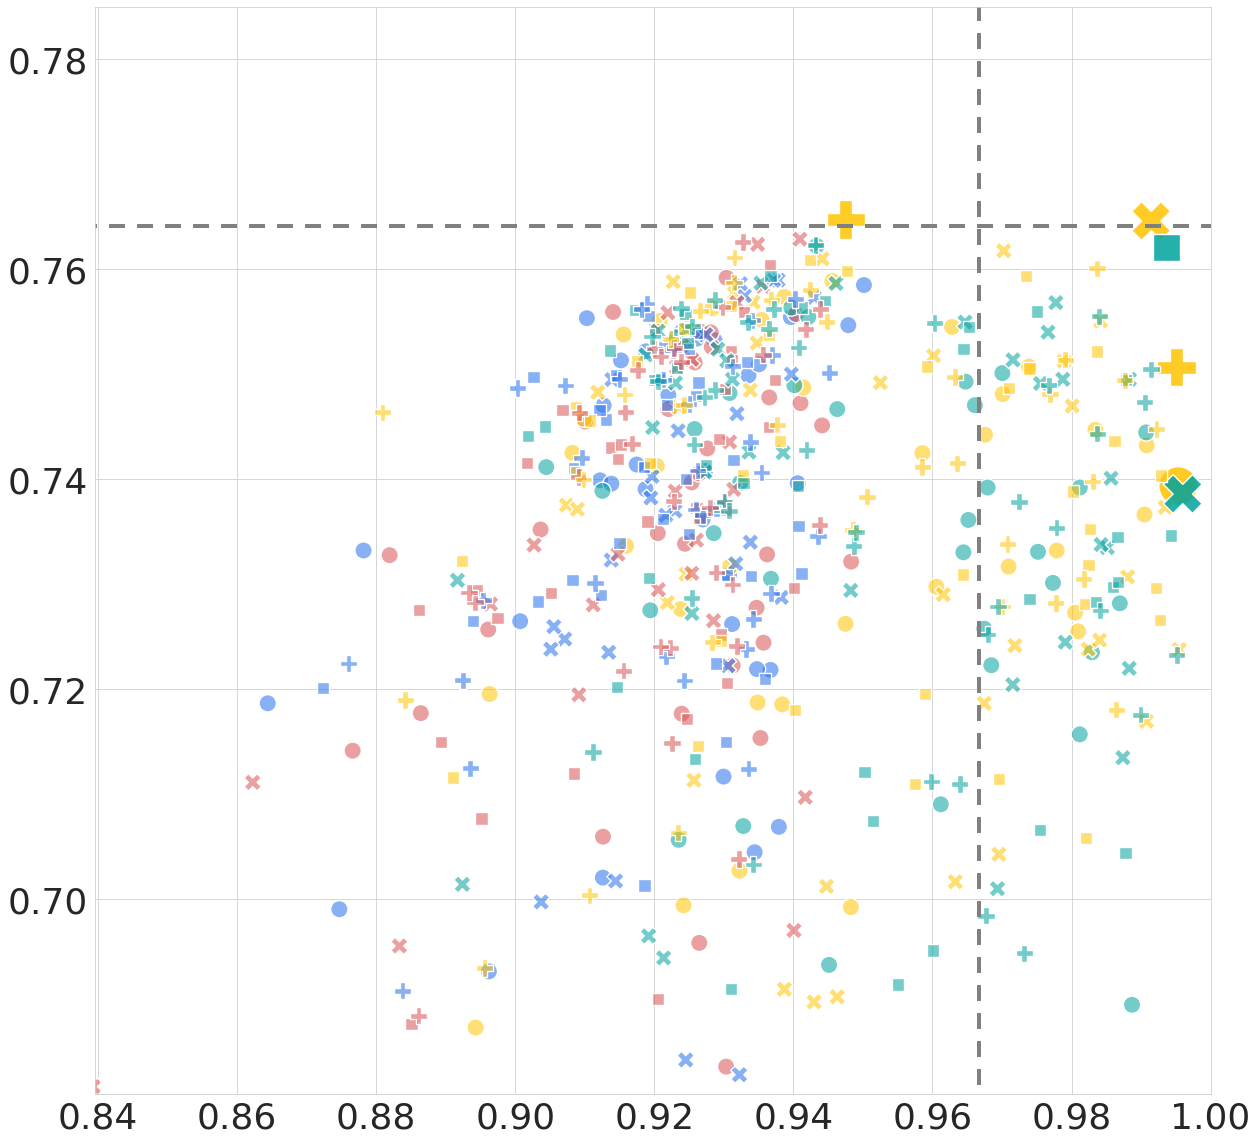

In [93]:
plot_scatter(
    model_results_df[~model_results_df["graph_type"].isin(["ges", "grasp"])],
    figsize=(20, 20),
    xlims=(0.8395, 1.0),
    ylims=(0.6815, 0.785),
    #hue="uses_target_for_distillation",
    hue="method_type",
    #hue="test_independence_roc_auc",
    alt_palette="coolwarm",
    black_box="cub_nn",
    scaled=False,
    only_true_independent=True,
    true_independence_threshold=1.0,
    pareto_size_multiplicative=4,
    normal_size=300,
    alpha=0.55,
    legend=False,
    color_palette=["#2770EB","#da5252","#FFC400", "#00a39e", "#A87AEA","#19274E"],
    #independence_opacity=True,
)

In [94]:
def plot_kde(
    df_results,
    black_box: str,
    color_palette,
    col: str = "test_abs_fidelity",
    hue_col="method_type",
    other_col: str = None,
    other_limits=None,
    bw_adjust: float = 0.3,
    figsize=(10, 1.5),
    limits=(0.0, 1.0),
    grid: bool = True,
    alpha: float = 0.05,
):
    plt.figure(figsize=figsize)
    sns.set_style("whitegrid")
    
    n_colors = df_results[hue_col].nunique(dropna=False)

    kde_plot = sns.kdeplot(
        data=df_results[
            (df_results["black_box"] == black_box)
            & (other_limits[0] < df_results[other_col] if other_col else True)
            & (df_results[other_col] < other_limits[1] if other_col else True)
        ],
        x=col,
        hue=hue_col,
        cut=2,
        palette=color_palette[:n_colors],
        gridsize=1000,
        bw_adjust=bw_adjust,
        shade=True,
        clip=limits,
        legend=False,
        alpha=alpha,
        linewidth=5,
    )

    kde_plot.set(xticklabels=[])
    kde_plot.set(yticklabels=[])
    kde_plot.set(xlabel=None)
    kde_plot.set(ylabel=None)
    kde_plot.tick_params(bottom=False)  # remove the ticks
    plt.gca().grid(grid)
    if not grid:
        sns.despine(bottom = True, left = True)
        
    plt.xlim(limits)

    plt.show()

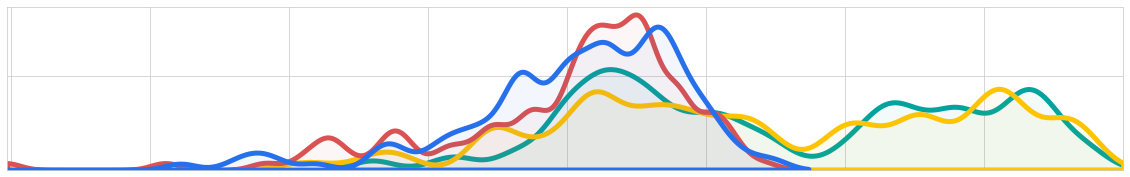

In [96]:
plot_kde(
    model_results_df[~model_results_df["graph_type"].isin(["ges", "grasp"])].reset_index(),
    "cub_nn",
    figsize=(20, 3),
    col="test_abs_fidelity",
    hue_col="method_type",
    limits=(0.8395, 1.0),
    other_col="test_concept_acc",
    other_limits=(0.6815, 0.785),
    bw_adjust=0.3,
    color_palette=["#2770EB","#da5252","#FFC400", "#00a39e", "#A87AEA","#19274E"],
)

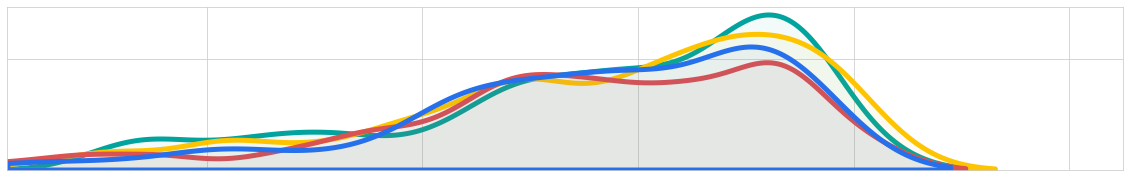

In [98]:
plot_kde(
    model_results_df[
        ~model_results_df["graph_type"].isin(["ges", "grasp"])
    ].reset_index(),
    "cub_nn",
    figsize=(20, 3),
    col="test_concept_acc",
    hue_col="method_type",
    limits=(0.6815, 0.785),
    other_col="test_abs_fidelity",
    other_limits=(0.8395, 1.0),
    bw_adjust=0.3,
    color_palette=["#2770EB","#da5252","#FFC400", "#00a39e", "#A87AEA","#19274E"],
)

In [29]:
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['axes.titlesize'] = 60
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

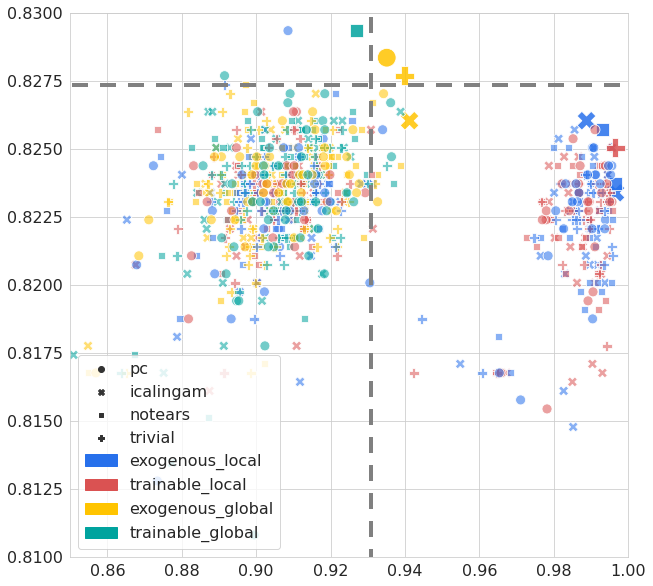

In [32]:
plot_scatter(
    model_results_df[~model_results_df["graph_type"].isin(["ges", "grasp"])],
    figsize=(10, 10),
    xlims=(0.85, 1.0),
    ylims=(0.81, 0.83),
    #hue="uses_target_for_distillation",
    hue="method_type",
    #hue="test_independence_roc_auc",
    alt_palette="coolwarm",
    black_box="fraud_lgbm",
    scaled=False,
    only_true_independent=True,
    true_independence_threshold=1.0,
    pareto_size_multiplicative=2.5,
    normal_size=100,
    alpha=0.55,
    legend=True,
    #independence_opacity=True,
)

In [615]:
model_results_df[
    ~model_results_df["graph_type"].isin(["ges", "grasp"])
    #& (model_results_df["test_independence_roc_auc"] < 0.7)
].groupby(["black_box", "method_type"]).apply(
    lambda x: x.sort_values("performance_sum", ascending=False).head(1)
)[
    [
        "model_id",
        "graph_type",
        "method_type",
        "test_mean_golden_roc_auc",
        "test_abs_fidelity",
        "test_independence_roc_auc",
        "test_diversity_dataset_0",
        "performance_sum"
    ]
]

model_id graph_type  \
black_box  method_type                                                          
cub_nn     exogenous_global 2764  10873f166a3c7b252873f0550b3cae2e    trivial   
           exogenous_local  519   6fbe8771be1798eee10dbe4ac48523e1    trivial   
           trainable_global 207   5a7475a96dcdb835ac1e21a60b826eb8    notears   
           trainable_local  375   e6dd98bcbe75ee7b5dbd4f02c1e90644    trivial   
fraud_lgbm exogenous_global 132   632176b57f0d8ea6438b75b1add23d38    notears   
           exogenous_local  1266  fb263ff3221d29ba77aec65aa82079de    trivial   
           trainable_global 26    5776f3e9bb8a00ee86d772ec721f8410    notears   
           trainable_local  1032  30364577aed2891e3b83afe7c366f542    trivial   
fraud_nn   exogenous_global 1956  2356121b81ecafadd32a160880281e59    notears   
           exogenous_local  2198  ea202e82b928aeee0dc8b09747508b44    trivial   
           trainable_global 1923  8aa71706d663b1cc8422ba46c56a4369    notears   
           trainable_local  2294  51b97dd1a5455e9889f95bc48bf85256    trivial   

                                       method_type  test_mean_golden_roc_auc  \
black_box  method_type                                                         
cub_nn     exogenous_global 2764  exogenous_global                  0.761759   
           exogenous_local  519    exogenous_local                  0.746488   
           trainable_global 207   trainable_global                  0.756334   
           trainable_local  375    trainable_local                  0.768038   
fraud_lgbm exogenous_global 132   exogenous_global                  0.785646   
           exogenous_local  1266   exogenous_local                  0.778353   
           trainable_global 26    trainable_global                  0.776755   
           trainable_local  1032   trainable_local                  0.770742   
fraud_nn   exogenous_global 1956  exogenous_global                  0.773665   
           exogenous_local  2198   exogenous_local                  0.777057   
           trainable_global 1923  trainable_global                  0.770692   
           trainable_local  2294   trainable_local                  0.771370   

                                  test_abs_fidelity  \
black_box  method_type                                
cub_nn     exogenous_global 2764           0.940941   
           exogenous_local  519            0.988332   
           trainable_global 207            0.950150   
           trainable_local  375            0.991466   
fraud_lgbm exogenous_global 132            0.928285   
           exogenous_local  1266           0.994827   
           trainable_global 26             0.909442   
           trainable_local  1032           0.994971   
fraud_nn   exogenous_global 1956           0.965442   
           exogenous_local  2198           0.995434   
           trainable_global 1923           0.966468   
           trainable_local  2294           0.994147   

                                  test_independence_roc_auc  \
black_box  method_type                                        
cub_nn     exogenous_global 2764                   0.950752   
           exogenous_local  519                    0.875154   
           trainable_global 207                    0.841791   
           trainable_local  375                    0.946312   
fraud_lgbm exogenous_global 132                    0.982526   
           exogenous_local  1266                   0.990888   
           trainable_global 26                     0.978939   
           trainable_local  1032                   0.981523   
fraud_nn   exogenous_global 1956                   0.971205   
           exogenous_local  2198                   0.987644   
           trainable_global 1923                   0.982372   
           trainable_local  2294                   0.984365   

                                  test_diversity_dataset_0  performance_sum  
black_box  method_type                                                

In [616]:
model_results_df[
    ~model_results_df["graph_type"].isin(["ges", "grasp"])
    # & (model_results_df["test_independence_roc_auc"] < 0.7)
].groupby(["black_box", "method_type"]).apply(
    lambda x: x.sort_values("performance_sum", ascending=False).head(1)
)[
    "model_id"
].tolist()

['10873f166a3c7b252873f0550b3cae2e',
 '6fbe8771be1798eee10dbe4ac48523e1',
 '5a7475a96dcdb835ac1e21a60b826eb8',
 'e6dd98bcbe75ee7b5dbd4f02c1e90644',
 '632176b57f0d8ea6438b75b1add23d38',
 'fb263ff3221d29ba77aec65aa82079de',
 '5776f3e9bb8a00ee86d772ec721f8410',
 '30364577aed2891e3b83afe7c366f542',
 '2356121b81ecafadd32a160880281e59',
 'ea202e82b928aeee0dc8b09747508b44',
 '8aa71706d663b1cc8422ba46c56a4369',
 '51b97dd1a5455e9889f95bc48bf85256']

In [15]:
MODEL_IDS = [
    "10873f166a3c7b252873f0550b3cae2e",
    "6fbe8771be1798eee10dbe4ac48523e1",
    "5a7475a96dcdb835ac1e21a60b826eb8",
    "e6dd98bcbe75ee7b5dbd4f02c1e90644",
    "632176b57f0d8ea6438b75b1add23d38",
    "fb263ff3221d29ba77aec65aa82079de",
    "5776f3e9bb8a00ee86d772ec721f8410",
    "30364577aed2891e3b83afe7c366f542",
    "2356121b81ecafadd32a160880281e59",
    "ea202e82b928aeee0dc8b09747508b44",
    "8aa71706d663b1cc8422ba46c56a4369",
    "51b97dd1a5455e9889f95bc48bf85256",
]

model_results_df[model_results_df["model_id"].isin(MODEL_IDS)]

,model_id,n_epochs,cat_feat_embedding,data_augmentation,soft_labels,lr,l2_decay,train_every,gamma,independence_discriminator_dropouts,independence_discriminator_layers,local_dropouts,local_layers,concept_dropouts,concept_layers,common_dropouts,common_layers,n_batches,batch_size,only_causal_sources,concept_graph_edges,uses_target_for_distillation,has_causal_biases,validation_mean_golden_roc_auc,validation_abs_fidelity,validation_rel_fidelity,validation_norm_fidelity,validation_recall_at_10fpr,validation_recall_at_5fpr,validation_recall_at_3fpr,validation_recall_at_1fpr,validation_diversity_max_0,validation_diversity_max_1,validation_diversity_dataset_0,validation_diversity_dataset_1,validation_diversity_pairwise_0,validation_diversity_pairwise_1,validation_avg_bce_loss,validation_avg_base_bce_loss,validation_independence_roc_auc,validation_independence_bce_loss,test_mean_golden_roc_auc,test_abs_fidelity,test_rel_fidelity,test_norm_fidelity,test_avg_bce_loss,test_avg_base_bce_loss,test_independence_roc_auc,test_independence_bce_loss,test_recall_at_10fpr,test_recall_at_5fpr,test_recall_at_3fpr,test_recall_at_1fpr,test_diversity_max_0,test_diversity_max_1,test_diversity_pairwise_0,test_diversity_pairwise_1,test_diversity_dataset_0,test_diversity_dataset_1,model_category,local,graph_type,black_box,method_type,trivial,validation_independence_metric,test_independence_metric,selection_metric,performance_sum,validation_concept_acc,test_concept_acc
0,5776f3e9bb8a00ee86d772ec721f8410,33,loaded,None,True,0.010,0.000005,NaN,NaN,None,None,None,None,"[0.2, 0.0, 0.0, 0.0]","[32, 16, 1]","[0.5, 0.1, 0.1]","[200, 100, 50]",953,484,False,"[(Good customer history_soft, Suspicious Deliv...",None,False,0.776207,0.932419,0.630244,0.390916,0.562928,0.470738,0.412030,0.306130,0.729980,0.636066,NaN,NaN,0.548534,0.548534,0.473957,0.778147,0.977869,0.184960,0.776755,0.909442,0.533269,0.336206,0.489643,0.737643,0.978939,0.185063,0.095693,0.011985,0.004430,0.001906,0.688173,0.619322,0.551266,0.551266,0.068956,0.068956,trainable_global_notears_fraud_lgbm,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,632176b57f0d8ea6438b75b1add23d38,47,loaded,None,True,0.010,0.000007,1.0,0.004737,"[0.1, 0.01, 0.0, 0.0, 0.0]","[24, 12, 8, 6, 4, 1]",None,None,"[0.1, 0.0, 0.0, 0.0]","[16, 8, 4, 1]","[0.5, 0.1, 0.1]","[256, 128, 64]",876,527,False,"[(Good customer history_soft, Suspicious Deliv...",None,False,0.785646,0.934141,0.622797,0.395687,0.572519,0.479556,0.421905,0.311613,0.729246,0.635476,NaN,NaN,0.548423,0.548423,0.470244,0.778147,0.983651,0.159433,0.785646,0.928285,0.576735,0.376387,0.460003,0.737643,0.982526,0.160972,0.117256,0.011740,0.004269,0.001941,0.685990,0.605700,0.549048,0.549048,0.064757,0.064806,exogenous_global_notears_fraud_lgbm,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8aa71706d663b1cc8422ba46c56a4369,64,loaded,None,True,0.001,0.000015,NaN,NaN,None,None,None,None,"[0.1, 0.0, 0.0, 0.0]","[32, 16, 1]","[0.2, 0.1, 0.0]","[200, 100, 50]",731,349,False,"[(Good customer history_soft, High speed order...",None,True,0.774106,0.972867,0.879717,0.275947,0.554975,0.460956,0.402629,0.289892,0.634436,0.634436,NaN,NaN,0.533333,0.533333,0.618862,0.854720,0.983570,0.157885,0.770692,0.966468,0.861721,0.283345,0.634077,0.884773,0.982372,0.159919,0.120119,0.016010,0.004041,0.000610,0.595792,0.595792,0.533333,0.533333,0.044579,0.044579,trainable_global_notears_fraud_nn,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2356121b81ecafadd32a160880281e59,48,loaded,None,True,0.010,0.000005,2.0,0.004786,"[0.1, 0.01, 0.0, 0.0, 0.0]","[10, 8, 3, 1]",None,None,"[0.2, 0.0, 0.0, 0.0]","[32, 16, 1]","[0.5, 0.1, 0.1]","[200, 100, 50]",953,484,False,"[(Good customer history_soft, High speed order...",None,False,0.773665,0.969505,0.871401,0.274505,0.552554,0.457527,0.390879,0.287836,0.373002,0.594815,NaN,NaN,0.482816,0.482816,0.620095,0.854720,0.972492,0.200108,0.773665,0.965442,0.863361,0.283354,0.634069,0.884773,0.971205,0.216464,0.108760,0.010292,0.002440,0.000381,0.342853,0.5187

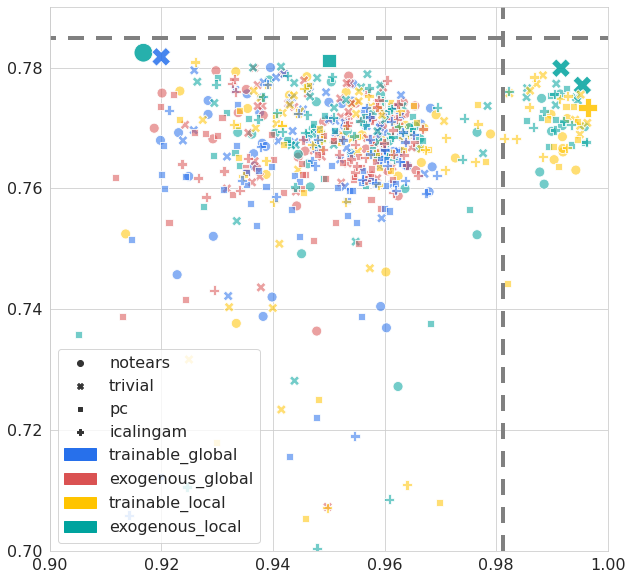

In [602]:
plot_scatter(
    model_results_df,
    figsize=(10, 10),
    xlims=(0.90, 1.0),
    ylims=(0.70, 0.79),
    hue="method_type",
    #hue="test_independence_roc_auc",
    alt_palette="coolwarm",
    black_box="fraud_nn",
    scaled=False,
    only_true_independent=True,
    true_independence_threshold=1.0,
    pareto_size_multiplicative=2.5,
    normal_size=100,
    alpha=0.55,
    legend=True,
    #independence_opacity=True,
)

In [614]:
model_results_df[
    (model_results_df["black_box"] == "fraud_nn")
    #& (model_results_df["test_independence_roc_auc"] < 0.7)
].sort_values("performance_sum", ascending=False).head(10)[
    [
        "model_id",
        "graph_type",
        "method_type",
        "test_mean_golden_roc_auc",
        "test_abs_fidelity",
        "test_independence_roc_auc",
        "test_diversity_dataset_0"
    ]
]

,model_id,graph_type,method_type,test_mean_golden_roc_auc,test_abs_fidelity,test_independence_roc_auc,test_diversity_dataset_0
2198,ea202e82b928aeee0dc8b09747508b44,trivial,exogenous_local,0.777057,0.995434,0.987644,0.069654
2181,347eee064b323ce440e695b35faa89b0,trivial,exogenous_local,0.779898,0.991603,0.989805,0.095113
2294,51b97dd1a5455e9889f95bc48bf85256,trivial,trainable_local,0.771370,0.994147,0.984365,0.095708
2281,365686b1e58c40987b254848a4ee927d,trivial,trainable_local,0.775525,0.995133,0.990704,0.065279
2223,f666ba705cb4144f570a064c640e30f3,trivial,exogenous_local,0.774563,0.994639,0.986271,NaN
2222,9e3eb2da7f91e6c86d079727cbfa2d99,trivial,exogenous_local,0.775067,0.994298,0.988703,0.051147
2272,b32614f95e1311f40d905282b52aed4b,pc,exogenous_local,0.776464,0.992537,0.944004,NaN
2523,f8325dfbeeb126a837129713f6253f3b,icalingam,trainable_local,0.773393,0.996385,0.975361,0.107832
2187,ef85ea5da88f84aee2622f782d402097,trivial,exogenous_local,0.777338,0.990758,0.985590,0.075752
2322,afe5131a08f29862bf3f238a62b9eb70,trivial,trainable_local,0.768952,0.994993,0.988245,NaN


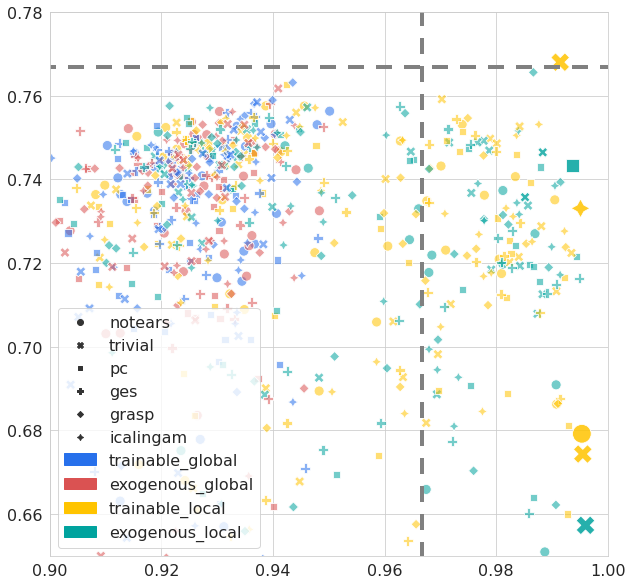

In [604]:
plot_scatter(
    model_results_df,
    figsize=(10, 10),
    xlims=(0.9, 1.0),
    ylims=(0.65, 0.78),
    hue="method_type",
    #hue="test_independence_roc_auc",
    alt_palette="coolwarm",
    black_box="cub_nn",
    scaled=False,
    only_true_independent=True,
    true_independence_threshold=1.0,
    pareto_size_multiplicative=2.5,
    normal_size=100,
    alpha=0.55,
    legend=True,
    #independence_opacity=True,
)

In [613]:
model_results_df[
    (model_results_df["black_box"] == "cub_nn")
    #& (model_results_df["test_independence_roc_auc"] < 0.7)
].sort_values("performance_sum", ascending=False).head(10)[
    [
        "model_id",
        "graph_type",
        "method_type",
        "test_mean_golden_roc_auc",
        "test_abs_fidelity",
        "test_independence_roc_auc",
        "test_diversity_dataset_0"
    ]
]

,model_id,graph_type,method_type,test_mean_golden_roc_auc,test_abs_fidelity,test_independence_roc_auc,test_diversity_dataset_0
1469,46311852e1bff769ba408e4c789ba47e,grasp,exogenous_local,0.765615,0.986653,0.930831,0.157267
375,e6dd98bcbe75ee7b5dbd4f02c1e90644,trivial,trainable_local,0.768038,0.991466,0.946312,0.092838
2,6fbe8771be1798eee10dbe4ac48523e1,trivial,exogenous_local,0.746488,0.988332,0.875154,0.183290
519,6fbe8771be1798eee10dbe4ac48523e1,trivial,exogenous_local,0.746488,0.988332,0.875154,0.183290
0,592c21f31ae4451c8f520a19274aaa82,trivial,trainable_local,0.752694,0.984187,0.916605,0.136214
1375,8973350f62c0b91afbbec8b751305d15,icalingam,trainable_local,0.753159,0.987638,0.675937,0.063230
1369,f314cc5caa6b913c72e061495cf323d1,icalingam,trainable_local,0.750553,0.983656,0.829617,0.063779
725,f2d954eb38ab5093585113bc782b2564,pc,exogenous_local,0.743283,0.993684,0.884653,0.076089
1464,52b9472c02b84b65dda5a1cfb1a8dc85,grasp,exogenous_local,0.739354,0.991501,0.906955,0.131640
1691,b1c3b7bc8b62b47521395ffe6159d5ab,icalingam,exogenous_local,0.751652,0.983990,0.783737,0.069381


In [178]:
model_results_df.columns

Index(['model_id', 'n_epochs', 'cat_feat_embedding', 'data_augmentation',
       'soft_labels', 'lr', 'l2_decay', 'train_every', 'gamma',
       'independence_discriminator_dropouts',
       'independence_discriminator_layers', 'local_dropouts', 'local_layers',
       'concept_dropouts', 'concept_layers', 'common_dropouts',
       'common_layers', 'n_batches', 'batch_size', 'only_causal_sources',
       'concept_graph_edges', 'uses_target_for_distillation',
       'has_causal_biases', 'validation_mean_golden_roc_auc',
       'validation_abs_fidelity', 'validation_rel_fidelity',
       'validation_norm_fidelity', 'validation_recall_at_10fpr',
       'validation_recall_at_5fpr', 'validation_recall_at_3fpr',
       'validation_recall_at_1fpr', 'validation_diversity_max_0',
       'validation_diversity_max_1', 'validation_diversity_dataset_0',
       'validation_diversity_dataset_1', 'validation_diversity_pairwise_0',
       'validation_diversity_pairwise_1', 'validation_avg_bce_loss',
   

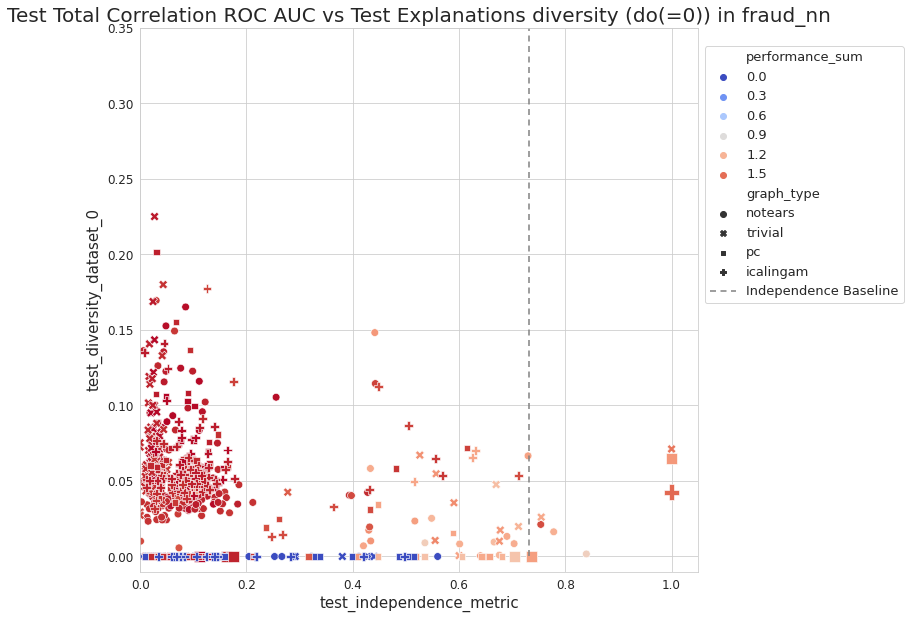

In [153]:
plot_scatter(
    model_results_df,
    figsize=(10, 10),
    xlims=(0, 1.05),
    ylims=(-0.01, 0.35),
    #hue="test_independence_roc_auc",
    hue="performance_sum",
    black_box="fraud_nn",
    alt_palette="coolwarm",
    metrics=["independence", "diversity_0"],
    scaled=False,
    only_true_independent=True,
    true_independence_threshold=1.0,
    independence_opacity=True,
)

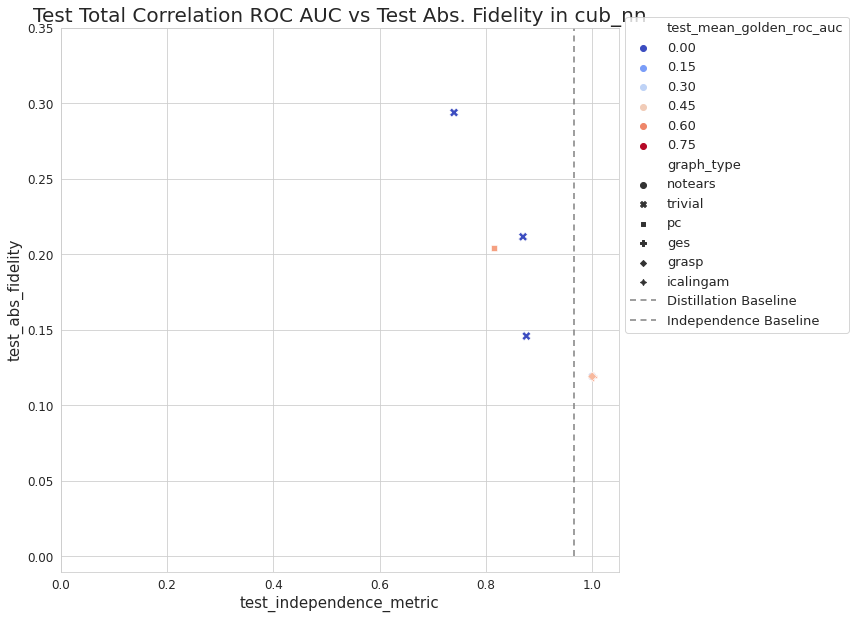

In [41]:
plot_scatter(
    model_results_df,
    figsize=(10, 10),
    xlims=(0, 1.05),
    ylims=(-0.01, 0.35),
    #hue="test_independence_roc_auc",
    hue="test_mean_golden_roc_auc",
    black_box="cub_nn",
    alt_palette="coolwarm",
    metrics=["fidelity", "independence"],
    scaled=False,
    only_true_independent=True,
    true_independence_threshold=0.7,
    independence_opacity=True,
)

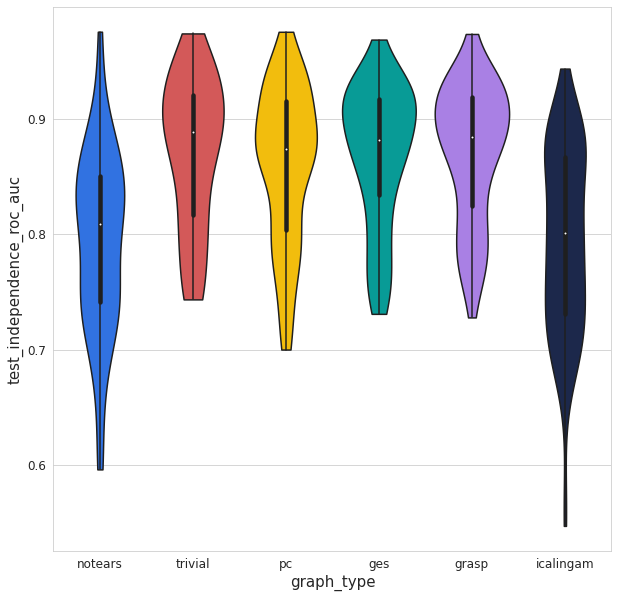

In [167]:
df_violin = model_results_df.copy()

fidelity_metric = "test_abs_fidelity"
explainability_metric = "test_mean_golden_roc_auc"

df_violin = df_violin[
    (df_violin[fidelity_metric] > 0.9) & (df_violin[explainability_metric] > 0.7)
]

plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.violinplot(
    data=df_violin[df_violin["black_box"] == "cub_nn"],
    x="graph_type",
    y="test_independence_roc_auc",
    palette=color_palette,
    cut=0,
    saturation=0.9,
);

In [169]:
df_violin.groupby("method_type").count()[["model_id"]].rename(columns={"model_id": "count"})

,count
method_type,
exogenous_global,314
exogenous_local,360
trainable_global,315
trainable_local,372
